In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

In [ ]:
%cd /content/drive/MyDrive/adlproject

/content/drive/MyDrive/adlproject


In [ ]:
%cd /content/drive/MyDrive/adlproject

!yolo task=detect mode=train model=yolov8s.pt data= google_colab_config.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/adlproject
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=google_colab_config.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

In [ ]:
!ls runs/detect/train11/

args.yaml					     P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch75.jpg
confusion_matrix.png				     R_curve.png       train_batch76.jpg
events.out.tfevents.1715113806.621545f65a41.50661.0  results.csv       train_batch77.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


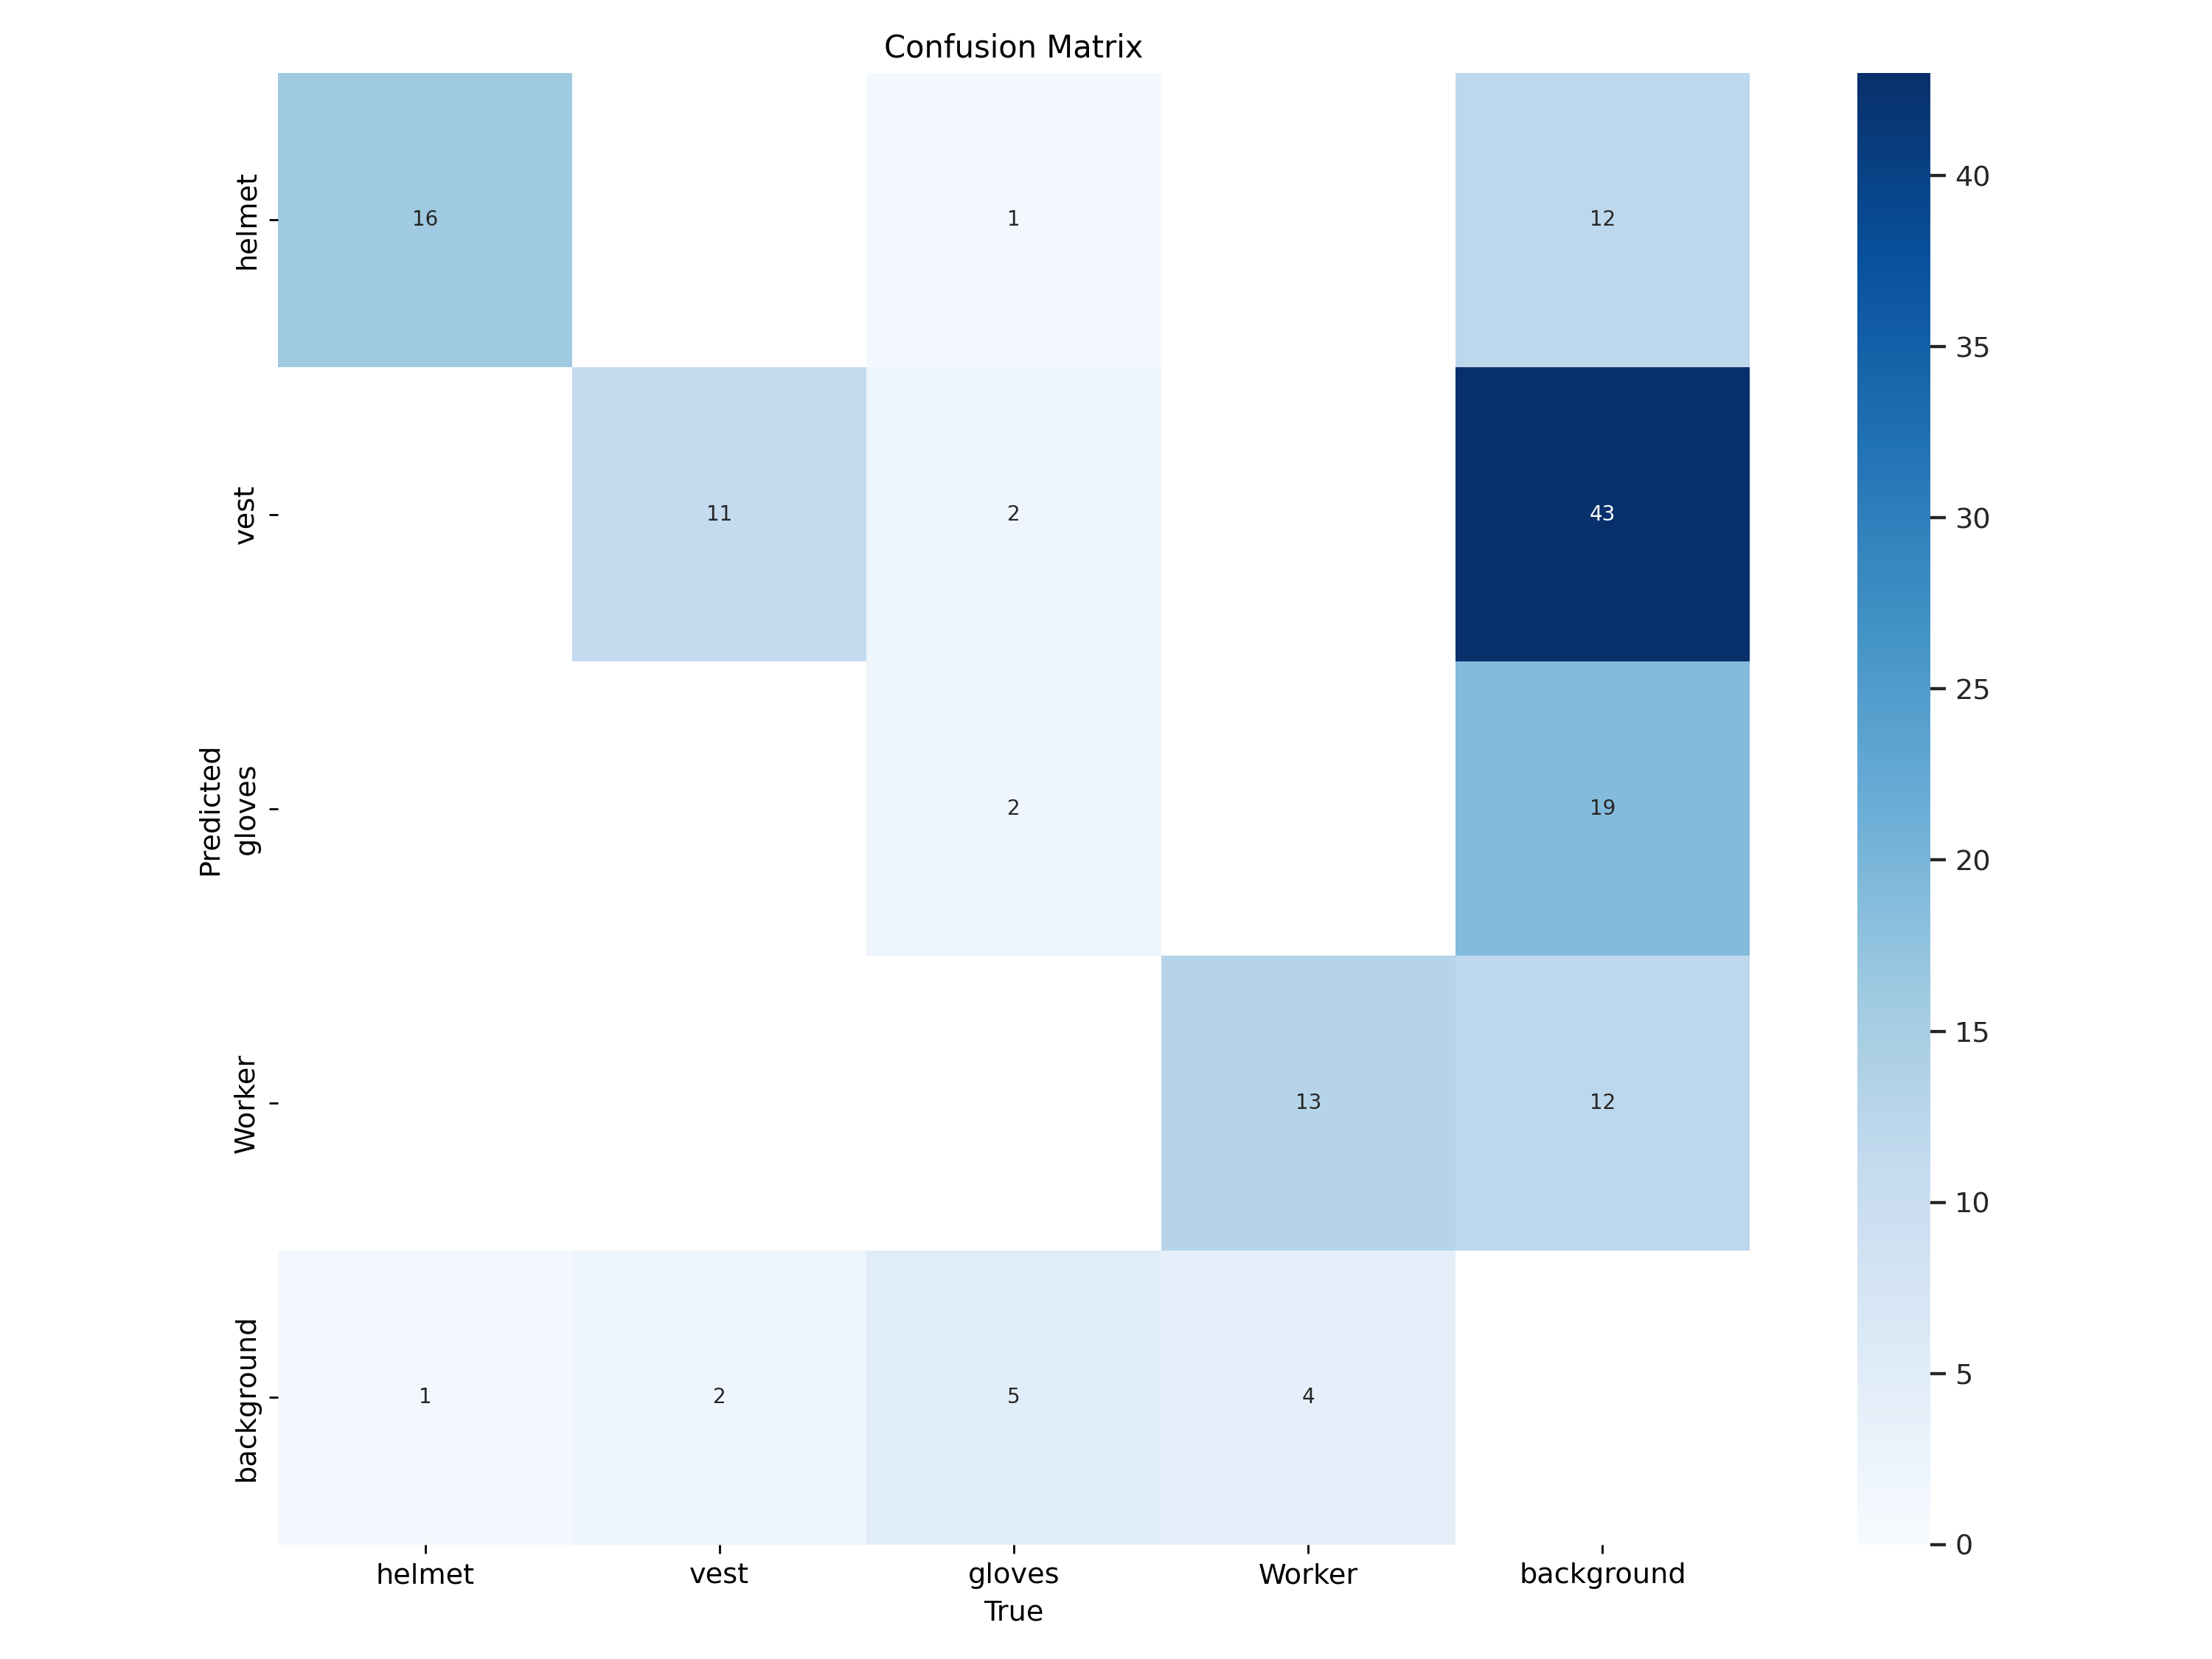

In [ ]:
from IPython.display import Image

# Display the image
Image(filename='runs/detect/train11/confusion_matrix.png', width=600)

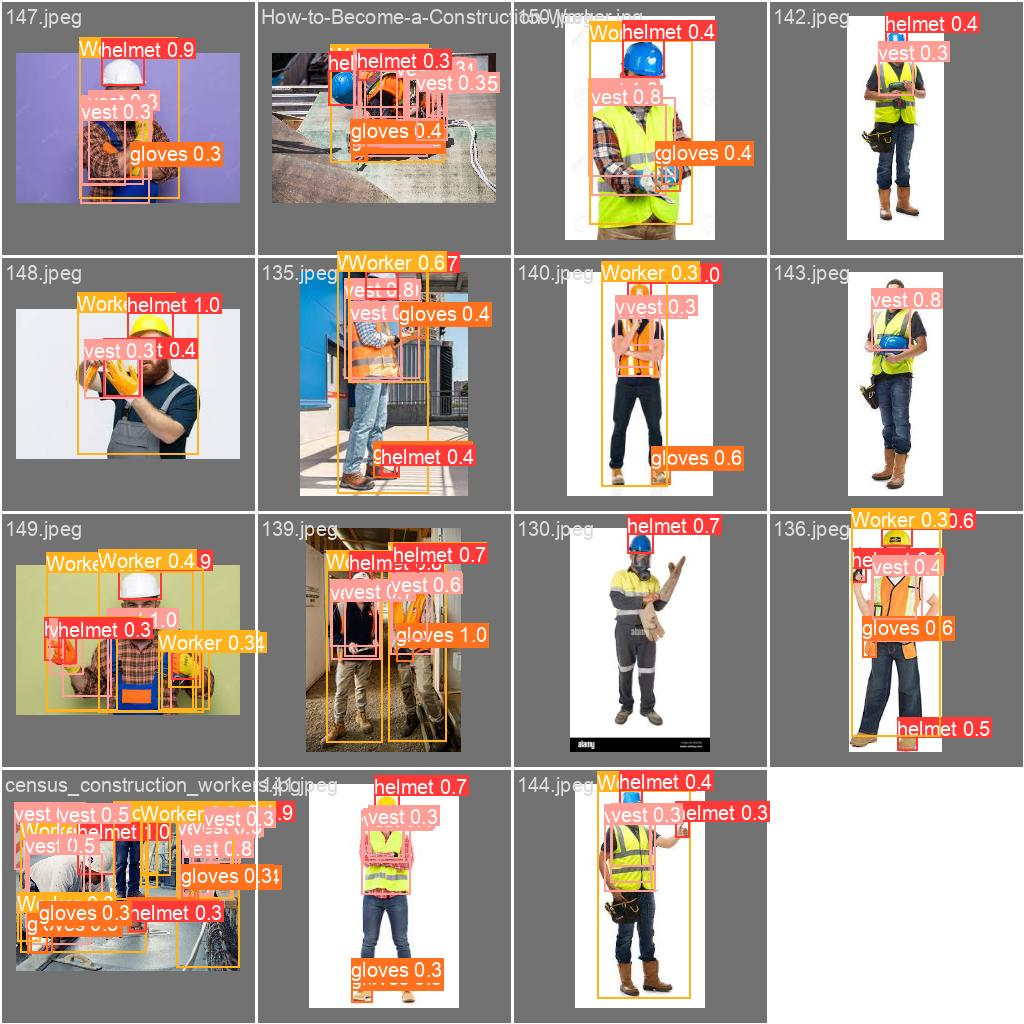

In [ ]:
Image(filename='runs/detect/train11/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train11/weights/best.pt data=google_colab_config.yaml

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/adlproject/data/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:05<00:00,  5.25s/it]
                   all         15         57      0.607      0.513      0.578      0.369
                helmet         15         17      0.914       0.63      0.856      0.544
                  vest         15         13      0.411      0.692      0.594      0.359
                gloves         15         10      0.188        0.1       0.13     0.0754
                Worker         15         17      0.915      0.631      0.731      0.498
Speed: 1.9ms preprocess, 143.3ms inference, 0.0ms loss, 187.0ms postprocess per image
Results saved to runs/detect/val5
💡 Lear

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train11/weights/best.pt conf=0.25 source=data/test/images

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/15 /content/drive/MyDrive/adlproject/data/test/images/37e13cd0-bad8-4e27-8984-d98706b599ed.jpg: 160x224 5 helmets, 8 vests, 5 Workers, 124.9ms
image 2/15 /content/drive/MyDrive/adlproject/data/test/images/3bf599c0-58d1-47d5-a788-53f398928f2c.jpg: 160x224 4 helmets, 10 vests, 2 glovess, 6 Workers, 75.7ms
image 3/15 /content/drive/MyDrive/adlproject/data/test/images/42 - Copy.jpeg: 192x224 8 helmets, 6 vests, 10 Workers, 92.2ms
image 4/15 /content/drive/MyDrive/adlproject/data/test/images/44 - Copy.jpeg: 224x160 2 helmets, 13 vests, 1 gloves, 2 Workers, 84.7ms
image 5/15 /content/drive/MyDrive/adlproject/data/test/images/46.jpeg: 160x224 3 helmets, 4 vests, 1 gloves, 2 Workers, 75.0ms
image 6/15 /content/drive/MyDrive/adlproject/data/test/images/51.jpeg: 192x224 1 helmet, 4 vests, 1 gloves, 1 Worker, 82.4ms
image 7/1

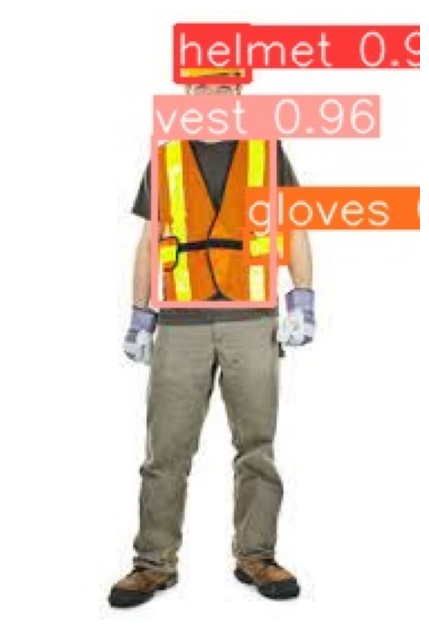

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image with OpenCV
image_path = "/content/drive/MyDrive/adlproject/runs/detect/predict9/95 - Copy.jpeg"  # Replace with the path to your output image
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (matplotlib uses RGB format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()